# importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import math as mt
from scipy.stats import norm
from scipy.stats import lognorm


# reading the dataset

In [2]:
data=pd.read_csv('data/insurance_claims.csv')
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [4]:
df=data.copy()

In [5]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [ ]:
# # doubt- ambiguity
# # insured_relationship
# insured_zip
# policy_state

In [6]:

print("----")
print(df[['police_report_available']].value_counts())
print("----")

----
police_report_available
?                          343
NO                         343
YES                        314
Name: count, dtype: int64
----


In [7]:
# replace " " with nan
df['police_report_available']=df['police_report_available'].replace("?",np.nan)

In [8]:
to_drop=['policy_number','insured_zip','incident_location','collision_type','_c39','policy_csl','insured_hobbies','police_report_available','authorities_contacted']

In [9]:
#remove columns from df
df=df.drop(to_drop,axis=1)

In [10]:
#PRIN NON ZERO OF CLM AMT
df['total_claim_amount'].loc[df['total_claim_amount']==0].count()

0

In [11]:
print(df[['policy_state']].value_counts())
print("----")

policy_state
OH              352
IL              338
IN              310
Name: count, dtype: int64
----


In [12]:
df

,months_as_customer,age,policy_bind_date,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,2014-10-17,OH,1000,1406.91,0,MALE,MD,craft-repair,...,1,2,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,2006-06-27,IN,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,0,0,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,2000-09-06,OH,2000,1413.14,5000000,FEMALE,PhD,sales,...,2,3,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,1990-05-25,IL,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,1,2,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,2014-06-06,IL,1000,1583.91,6000000,MALE,Associate,sales,...,0,1,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1991-07-16,OH,1000,1310.80,0,FEMALE,Masters,craft-repair,...,0,1,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,2014-01-05,IL,1000,1436.79,0,FEMALE,PhD,prof-specialty,...,2,3,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,2003-02-17,OH,500,1383.49,3000000,FEMALE,Masters,armed-forces,...,2,3,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,2011-11-18,IL,2000,1356.92,5000000,MALE,Associate,handlers-cleaners,...,0,1,46980,5220,5220,36540,Audi,A5,1998,N


In [13]:
# show missing count and rows
# df.isnull().sum()
# view only ones with null count >0
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [45]:
df.to_csv('data/final_df_cleaned.csv',index=False)

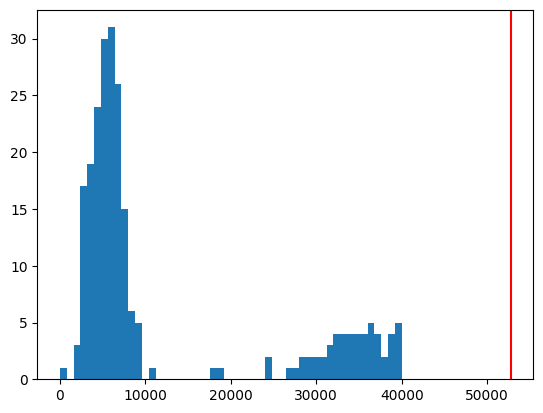

In [14]:
#plot histogram of claim amount
plt.hist(df['total_claim_amount'],bins=50,range=(0,40000))
#add line
plt.axvline(df['total_claim_amount'].mean(),color='red',label='mean')


/var/folders/t6/1kryld716d33z79v3k21z5_c0000gn/T/ipykernel_18541/487520328.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['total_claim_amount'],shade=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='total_claim_amount', ylabel='Density'>

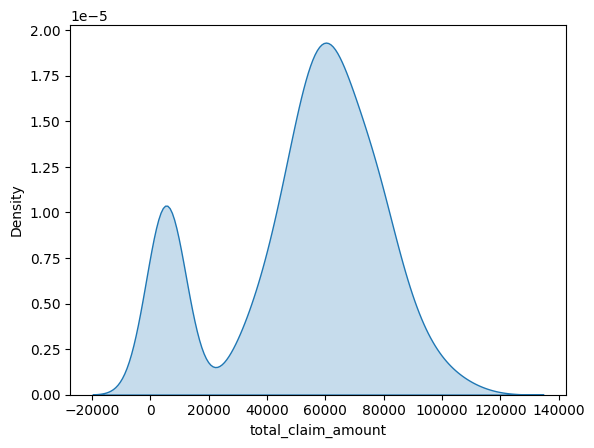

In [15]:
#plot density curve of claim amount
sns.kdeplot(df['total_claim_amount'],shade=True)

/var/folders/t6/1kryld716d33z79v3k21z5_c0000gn/T/ipykernel_18541/2890918318.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(np.log(df['total_claim_amount']),shade=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


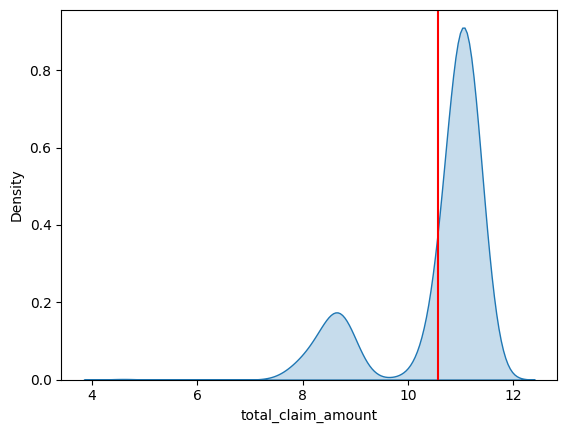

In [16]:
#plot density curve of lognoRMAL
sns.kdeplot(np.log(df['total_claim_amount']),shade=True)
#ADD MEAN LINE
plt.axvline(np.log(df['total_claim_amount']).mean(),color='red',label='mean')

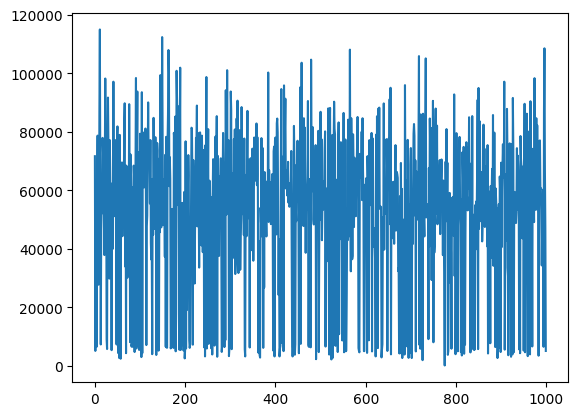

In [17]:
#LINE PLOT OF CLM AMT
plt.plot(df['total_claim_amount'])

# em

gmm= gaussian mixture model
LOGNORMAL= MANUAL CODING|| R ||
EM ALGO

In [49]:
df = pd.read_csv("final_df_cleaned.csv")
df.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,2014-10-17,OH,1000,1406.91,0,MALE,MD,craft-repair,...,1,2,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,2006-06-27,IN,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,0,0,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,2000-09-06,OH,2000,1413.14,5000000,FEMALE,PhD,sales,...,2,3,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,1990-05-25,IL,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,1,2,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,2014-06-06,IL,1000,1583.91,6000000,MALE,Associate,sales,...,0,1,6500,1300,650,4550,Accura,RSX,2009,N


In [50]:

# Load your data from the CSV file
data1 = pd.read_csv("final_df_cleaned.csv")['total_claim_amount'].values.reshape(-1, 1)

# Fit a Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, random_state=42)

# Fit the model to your data
model=gmm.fit(data1)

# Get the parameters
means1 = gmm.means_.flatten()
print(means1)
covariances1 = np.sqrt(gmm.covariances_).flatten()
print(covariances1)
weights = gmm.weights_
print(weights)


[62972.72926611  5408.94105341]
[16065.48621008  1703.72338207]
[0.82261784 0.17738216]


In [51]:
log_likelihood=model.score(data1)
print(f"Log Likelihood: {log_likelihood}")
n_components = 2
n_features = data1.shape[1]
parameters_per_component = 2
parameters_for_weights = n_components - 1

total_parameters = n_components * parameters_per_component + parameters_for_weights
print(f"Total number of parameters: {total_parameters}")

aic_score = -2 * log_likelihood + 2 * total_parameters
print(f"AIC Score: {aic_score}")

Log Likelihood: -11.169863374780736
Total number of parameters: 5
AIC Score: 32.33972674956147


In [52]:
# Accessing GMM components
n_components = gmm.n_components
print(f"Number of components: {n_components}")

# Accessing means, covariances, and weights
means = gmm.means_
covariances = gmm.covariances_
weights = gmm.weights_
converged = gmm.converged_
n_iterations = gmm.n_iter_
responsibilities = gmm.predict_proba(data1)

print("Means:")
print(means)
print("Covariances:")
print(covariances)
print("Weights:")
print(weights)
print(f"Convergence status: {converged}")
print(f"Number of iterations: {n_iterations}")
print("Responsibilities for each sample:")
print(responsibilities)


Number of components: 2
Means:
[[62972.72926611]
 [ 5408.94105341]]
Covariances:
[[[2.58099847e+08]]

 [[2.90267336e+06]]]
Weights:
[0.82261784 0.17738216]
Convergence status: True
Number of iterations: 6
Responsibilities for each sample:
[[1.00000000e+000 0.00000000e+000]
 [7.57370270e-004 9.99242630e-001]
 [1.00000000e+000 1.04258589e-063]
 ...
 [1.00000000e+000 8.18118544e-289]
 [1.00000000e+000 1.74306571e-129]
 [7.56569468e-004 9.99243431e-001]]


In [53]:
# Assign each data point to the cluster with the highest probability
assigned_clusters = np.argmax(responsibilities, axis=1)
# Add the assigned cluster information to your original DataFrame
df_with_clusters = pd.DataFrame(data1, columns=['Feature'])  # Adjust column names
df_with_clusters['AssignedCluster'] = assigned_clusters
df1=df_with_clusters[df_with_clusters['AssignedCluster']==0]
df2=df_with_clusters[df_with_clusters['AssignedCluster']==1]
print(len(df1))
print(len(df2))

822
178


In [22]:
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [23]:
df1

,Feature,AssignedCluster
0,71610,0
2,34650,0
3,63400,0
5,64100,0
6,78650,0
...,...,...
993,60200,0
995,87200,0
996,108480,0
997,67500,0


In [24]:
df2

,Feature,AssignedCluster
1,5070,1
4,6500,1
13,7280,1
26,9020,1
27,5720,1
...,...,...
964,3900,1
969,6600,1
983,3440,1
994,6480,1


In [54]:
#print max and min of df1 adn df2
print(df1['Feature'].max())
print(df1['Feature'].min())
print("----")
print(df2['Feature'].max())
print(df2['Feature'].min())

114920
18000
----
10790
100


# both normal

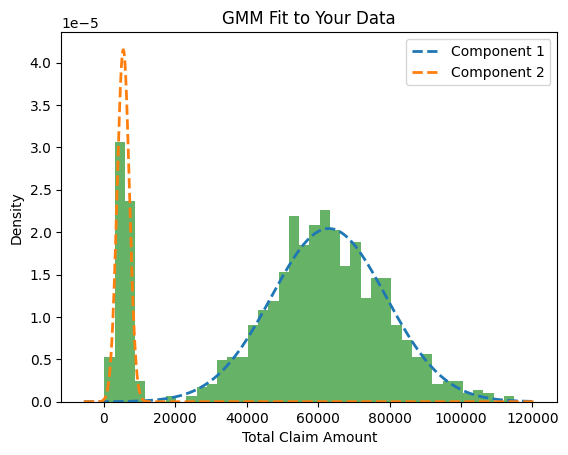

In [55]:
# Plot the data and the fitted GMM
data = pd.read_csv("final_df_cleaned.csv")['total_claim_amount']
data1 = pd.read_csv("final_df_cleaned.csv")['total_claim_amount'].values.reshape(-1, 1)
plt.hist(data1, bins=40, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)

for i in range(gmm.n_components):
    y = weights[i] * norm.pdf(x, means1[i], covariances1[i])
    plt.plot(x, y, label=f'Component {i+1}', linestyle='--', linewidth=2)

plt.title('GMM Fit to Your Data')
plt.xlabel('Total Claim Amount')
plt.ylabel('Density')
plt.legend()
plt.show()



In [56]:
df

,months_as_customer,age,policy_bind_date,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,2014-10-17,OH,1000,1406.91,0,MALE,MD,craft-repair,...,1,2,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,2006-06-27,IN,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,0,0,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,2000-09-06,OH,2000,1413.14,5000000,FEMALE,PhD,sales,...,2,3,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,1990-05-25,IL,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,1,2,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,2014-06-06,IL,1000,1583.91,6000000,MALE,Associate,sales,...,0,1,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1991-07-16,OH,1000,1310.80,0,FEMALE,Masters,craft-repair,...,0,1,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,2014-01-05,IL,1000,1436.79,0,FEMALE,PhD,prof-specialty,...,2,3,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,2003-02-17,OH,500,1383.49,3000000,FEMALE,Masters,armed-forces,...,2,3,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,2011-11-18,IL,2000,1356.92,5000000,MALE,Associate,handlers-cleaners,...,0,1,46980,5220,5220,36540,Audi,A5,1998,N


segregation in the mixture and features

<ignore>

# lognormal+normal

if x follows log normal => log x follows normal

In [57]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import math as mt
from scipy.stats import norm

# Load your data from the CSV file
data = pd.read_csv("final_df_cleaned.csv")['total_claim_amount'].values.reshape(-1, 1)
data1=np.log(data)
# Fit a Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, random_state=42)

# Fit the model to your data
gmm.fit(data1)

# Get the parameters
means1 = gmm.means_.flatten()
print(means1)
covariances1 = np.sqrt(gmm.covariances_).flatten()
print(covariances1)
weights = gmm.weights_
print(weights)

[11.01995969  8.54743392]
[0.26323597 0.46905316]
[0.8195472 0.1804528]


# components

In [28]:
# Accessing GMM components
n_components = gmm.n_components
print(f"Number of components: {n_components}")

# Accessing means, covariances, and weights
means = gmm.means_
covariances = gmm.covariances_
weights = gmm.weights_
converged = gmm.converged_
n_iterations = gmm.n_iter_
responsibilities = gmm.predict_proba(data1)

print("Means:")
print(means)
print("Covariances:")
print(covariances)
print("Weights:")
print(weights)
print(f"Convergence status: {converged}")
print(f"Number of iterations: {n_iterations}")
print("Responsibilities for each sample:")
print(responsibilities)

Number of components: 2
Means:
[[11.01995969]
 [ 8.54743392]]
Covariances:
[[[0.06929318]]

 [[0.22001087]]]
Weights:
[0.8195472 0.1804528]
Convergence status: True
Number of iterations: 3
Responsibilities for each sample:
[[9.99999978e-01 2.16878154e-08]
 [3.13718948e-19 1.00000000e+00]
 [9.99672821e-01 3.27179132e-04]
 ...
 [9.99999961e-01 3.90697734e-08]
 [9.99996930e-01 3.06972168e-06]
 [2.92279626e-19 1.00000000e+00]]


In [97]:
# Assign each data point to the cluster with the highest probability
assigned_clusters = np.argmax(responsibilities, axis=1)
# Add the assigned cluster information to your original DataFrame
df_with_clusters = pd.DataFrame(data1, columns=['Feature'])  # Adjust column names
df_with_clusters['AssignedCluster'] = assigned_clusters
df1=df_with_clusters[df_with_clusters['AssignedCluster']==0]
df2=df_with_clusters[df_with_clusters['AssignedCluster']==1]
print(len(df1))
print(len(df2))

820
180


In [48]:
df1

,Feature,AssignedCluster
0,71610,0
2,34650,0
3,63400,0
5,64100,0
6,78650,0
...,...,...
993,60200,0
995,87200,0
996,108480,0
997,67500,0


In [29]:
log_likelihood=model.score(data1)
print(f"Log Likelihood: {log_likelihood}")
n_components = 2
n_features = data1.shape[1]
parameters_per_component = 2
parameters_for_weights = n_components - 1

total_parameters = n_components * parameters_per_component + parameters_for_weights
print(f"Total number of parameters: {total_parameters}")

aic_score = -2 * log_likelihood + 2 * total_parameters
print(f"AIC Score: {aic_score}")

Log Likelihood: -15.075046200703348
Total number of parameters: 5
AIC Score: 40.150092401406695


# plot for log transformed

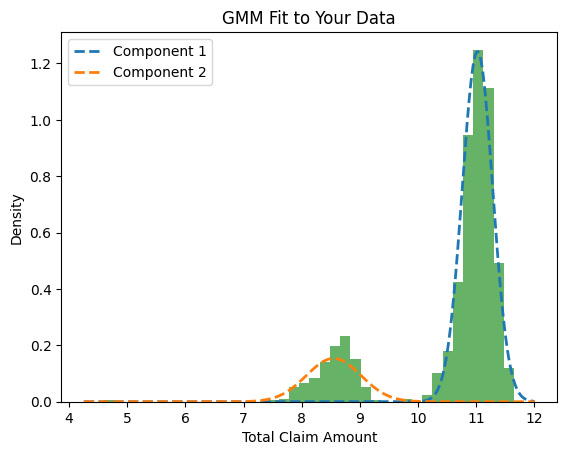

In [30]:
# Plot the data and the fitted GMM
plt.hist(data1, bins=40, density=True, alpha=0.6, color='g')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)

for i in range(gmm.n_components):
    y = weights[i] * norm.pdf(x, means1[i], covariances1[i])
    plt.plot(x, y, label=f'Component {i+1}', linestyle='--', linewidth=2)

plt.title('GMM Fit to Your Data')
plt.xlabel('Total Claim Amount')
plt.ylabel('Density')
plt.legend()
plt.show()

# fitting lognormal and normal separately

In [31]:
#data declaration
ln_data=df2['Feature']
n_data=df1['Feature']
print(len(ln_data))
print(len(n_data))

178
822


In [59]:
from scipy.stats import kstest
# Fit a lognormal distribution to the data
data=ln_data #178
shape1, loc1, scale1 = lognorm.fit(data)

# Generate PDF (Probability Density Function) values for the fitted distribution
x1 = np.linspace(min(data), max(data), 100)
pdf_values_ln_orig= lognorm.pdf(x1, shape1, loc1, scale1)

ks_statistic1, ks_p_value1 = kstest(data, 'lognorm', args=(shape1, loc1, scale1))
print(f'KS Statistic: {ks_statistic1}, P-value: {ks_p_value1}')
n = len(data)
log_likelihood1 = np.sum(lognorm.logpdf(data, s=shape1, loc=loc1, scale=scale1))
aic_ln_orig = 2 * (3 - log_likelihood1)
print(f'AIC for Lognormal Distribution: {aic_ln_orig}')

print("----")

#normal
loc11, scale11 = norm.fit(data)

# Generate PDF (Probability Density Function) values for the fitted distribution
x11= np.linspace(min(data), max(data), 100)
pdf_values_ln_n = norm.pdf(x11, loc=loc11, scale=scale11)
ks_statistic11, ks_p_value11 = kstest(data, 'norm', args=(loc11, scale11))
print(f'KS Statistic: {ks_statistic11}, P-value: {ks_p_value11}')
n = len(data)
log_likelihood11 = np.sum(norm.logpdf(data,loc=loc11, scale=scale11))
aic_ln_n = 2 * (2 - log_likelihood11)
print(f'AIC for normal Distribution: {aic_ln_n}')


KS Statistic: 0.032654504827222985, P-value: 0.9882247870685095
AIC for Lognormal Distribution: 3162.888011411839
----
KS Statistic: 0.031676195084338055, P-value: 0.9916794399610754
AIC for normal Distribution: 3160.9842597114857


In [33]:
#check if pdf_values_ln_orig is same as pdf_values_ln_n getting true or false
print(np.allclose(pdf_values_ln_orig,pdf_values_ln_n))

False


In [60]:
from scipy.stats import kstest
# Fit a lognormal distribution to the data
data=n_data #800
shape1, loc1, scale1 = lognorm.fit(data)

# Generate PDF (Probability Density Function) values for the fitted distribution
x1 = np.linspace(min(data), max(data), 100)
pdf_values_n_ln= lognorm.pdf(x1, shape1, loc1, scale1)

ks_statistic1, ks_p_value1 = kstest(data, 'lognorm', args=(shape1, loc1, scale1))
print(f'KS Statistic: {ks_statistic1}, P-value: {ks_p_value1}')
n = len(data)
log_likelihood1 = np.sum(lognorm.logpdf(data, s=shape1, loc=loc1, scale=scale1))
aic_n_ln = 2 * (3 - log_likelihood1)
print(f'AIC for Lognormal Distribution: {aic_n_ln}')

print("----")

#normal
loc11, scale11 = norm.fit(data)

# Generate PDF (Probability Density Function) values for the fitted distribution
x11 = np.linspace(min(data), max(data), 100)
pdf_values_n_orig = norm.pdf(x11, loc=loc11, scale=scale11)
ks_statistic11, ks_p_value11 = kstest(data, 'norm', args=(loc11, scale11))
print(f'KS Statistic: {ks_statistic11}, P-value: {ks_p_value11}')
n = len(data)
log_likelihood11 = np.sum(norm.logpdf(data,loc=loc11, scale=scale11))
aic_n_orig = 2 * (2 - log_likelihood11)
print(f'AIC for normal Distribution: {aic_n_orig}')


KS Statistic: 0.021882391304263393, P-value: 0.8177026736068351
AIC for Lognormal Distribution: 18247.22859755088
----
KS Statistic: 0.03604402538195628, P-value: 0.2303186704835175
AIC for normal Distribution: 18251.31479354897


In [35]:
#check if pdf_values_ln_orig is same as pdf_values_ln_n getting true or false
print(np.allclose(pdf_values_n_orig,pdf_values_n_ln))

False


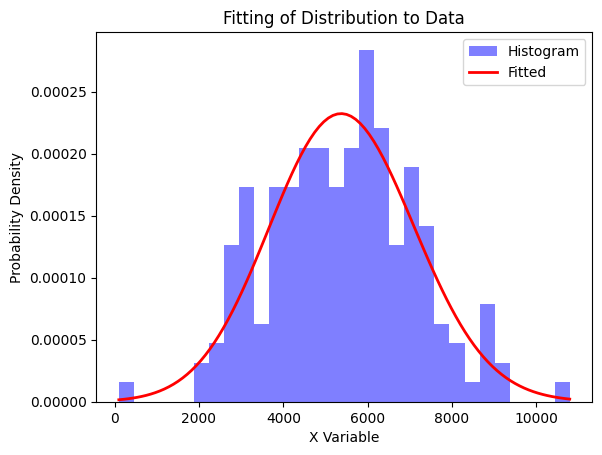

In [37]:
hist_data=ln_data
#hist_data=n_data
to_plot=pdf_values_ln_orig
#pdf_values_ln_n
#pdf_values_n_ln
#pdf_values_n_orig

# Plot the histogram of the data
plt.hist(hist_data, bins=30, density=True, alpha=0.5, color='blue', label='Histogram')

# Plot the fitted lognormal distribution
x = np.linspace(min(hist_data), max(hist_data), 100)
plt.plot(x, to_plot, 'r-', linewidth=2, label='Fitted')
#plt.plot(x, pdf_values_ln_n, 'r-', linewidth=2, label='Fitted Normal')
plt.legend()
plt.xlabel('X Variable')
plt.ylabel('Probability Density')
plt.title('Fitting of Distribution to Data')
plt.show()

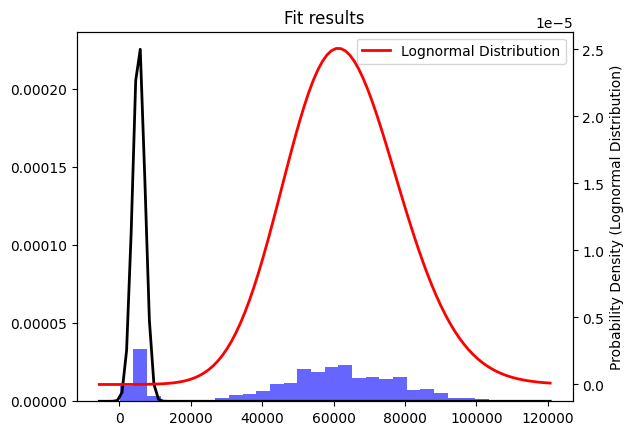

In [38]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm

# Assuming 'total_claim_amount' is your dataset
data = pd.read_csv("final_df_cleaned.csv")['total_claim_amount'].values.reshape(-1, 1)

# Fit a normal distribution
mu_norm, std_dev_norm = norm.fit(ln_data)

# Fit a lognormal distribution
shape_lognorm, loc_lognorm, scale_lognorm = lognorm.fit(n_data)  

# Plot the histogram of the data
plt.hist(data, bins=30, density=True, alpha=0.6, color='b', label='Histogram')

# Plot the PDF of the normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p_norm = norm.pdf(x, mu_norm, std_dev_norm)
plt.plot(x, p_norm, 'k', linewidth=2, label='Normal Distribution')

# Create a secondary y-axis for the lognormal distribution
ax2 = plt.gca().twinx()

# Plot the PDF of the lognormal distribution on the secondary axis
p_lognorm = lognorm.pdf(x, shape_lognorm, loc_lognorm, scale_lognorm)
ax2.plot(x, p_lognorm, 'r', linewidth=2, label='Lognormal Distribution')

# Adjust labels and legend
plt.title("Fit results")
plt.xlabel('Total Claim Amount')
plt.ylabel('Frequency (Histogram / Normal Distribution)')
ax2.set_ylabel('Probability Density (Lognormal Distribution)')
plt.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


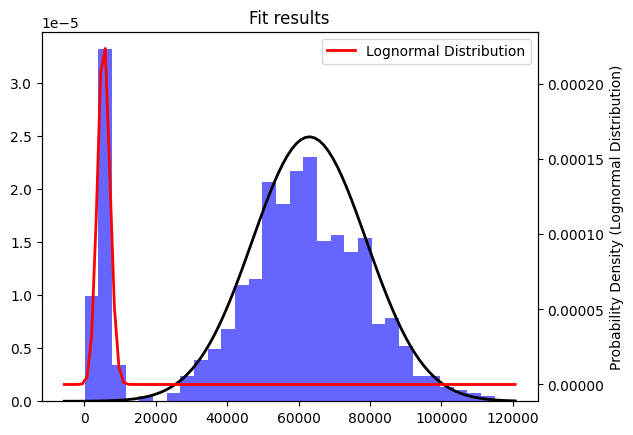

In [39]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm

# Assuming 'total_claim_amount' is your dataset
data = pd.read_csv("final_df_cleaned.csv")['total_claim_amount'].values.reshape(-1, 1)

# Fit a normal distribution
mu_norm, std_dev_norm = norm.fit(n_data)

# Fit a lognormal distribution
shape_lognorm, loc_lognorm, scale_lognorm = lognorm.fit(ln_data)  

# Plot the histogram of the data
plt.hist(data, bins=30, density=True, alpha=0.6, color='b', label='Histogram')

# Plot the PDF of the normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p_norm = norm.pdf(x, mu_norm, std_dev_norm)
plt.plot(x, p_norm, 'k', linewidth=2, label='Normal Distribution')

# Create a secondary y-axis for the lognormal distribution
ax2 = plt.gca().twinx()

# Plot the PDF of the lognormal distribution on the secondary axis
p_lognorm = lognorm.pdf(x, shape_lognorm, loc_lognorm, scale_lognorm)
ax2.plot(x, p_lognorm, 'r', linewidth=2, label='Lognormal Distribution')

# Adjust labels and legend
plt.title("Fit results")
plt.xlabel('Total Claim Amount')
plt.ylabel('Frequency (Histogram / Normal Distribution)')
ax2.set_ylabel('Probability Density (Lognormal Distribution)')
plt.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


# mixture distribution w weights

In [40]:

w1 = 0.81
w2 = 0.19


# Fit a normal distribution
mu_norm, std_dev_norm = norm.fit(ln_data)

shape_lognorm, loc_lognorm, scale_lognorm = lognorm.fit(n_data)

x_ln = np.linspace(np.min(ln_data), np.max(ln_data), 1000)
p_norm = norm.pdf(x_ln, mu_norm, std_dev_norm)

x_n = np.linspace(np.min(n_data), np.max(n_data), 1000)
p_lognorm = lognorm.pdf(x_n, shape_lognorm, loc_lognorm, scale_lognorm)

# Create the mixture distribution PDF
pdf = w1 * p_norm + w2 * p_lognorm

# Calculate log likelihood
log_likelihood = np.sum(np.log(pdf))
print(f"Log Likelihood: {log_likelihood}")

n_components = 2
n_features = data.shape[1]
parameters_per_component = 2
parameters_for_weights = n_components - 1

total_parameters = n_components * parameters_per_component + parameters_for_weights
print(f"Total number of parameters: {total_parameters}")

aic_score = -2 * log_likelihood + 2 * total_parameters
#aic_score = -2 * log_likelihood + 2 * 4
print(f"AIC Score: {aic_score}")


Log Likelihood: -10167.2223422358
Total number of parameters: 5
AIC Score: 20344.4446844716


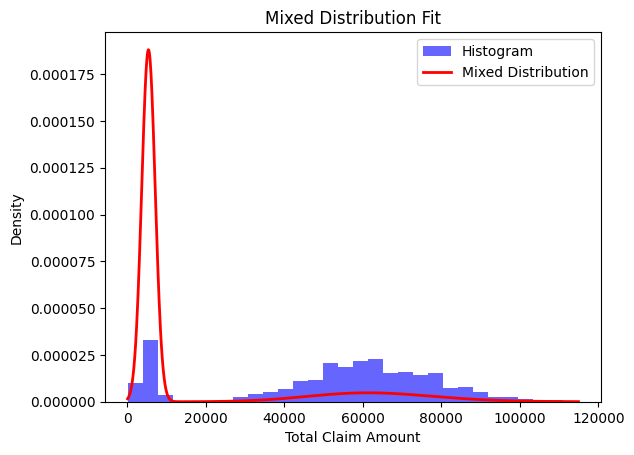

In [41]:
data = pd.read_csv("final_df_cleaned.csv")['total_claim_amount'].values.reshape(-1, 1)
w1 = 0.81
w2 = 0.19
mu_norm, std_dev_norm = norm.fit(ln_data)
shape_lognorm, loc_lognorm, scale_lognorm = lognorm.fit(n_data)

x = np.linspace(np.min(data), np.max(data), 1000)
p_norm = norm.pdf(x, mu_norm, std_dev_norm)
p_lognorm = lognorm.pdf(x, shape_lognorm, loc_lognorm, scale_lognorm)


pdf = w1 * p_norm + w2 * p_lognorm


plt.hist(data, bins=30, density=True, alpha=0.6, color='b', label='Histogram')


plt.plot(x, pdf, 'r', linewidth=2, label='Mixed Distribution')


plt.title('Mixed Distribution Fit')
plt.xlabel('Total Claim Amount')
plt.ylabel('Density')
plt.legend()


plt.show()


log normals
normals

log-178 manually
normal-822

em scratch

In [38]:
from scipy.stats import anderson
# Perform the Anderson-Darling test
ad_statistic, ad_critical_values, ad_significance_levels = anderson(df2['Feature'], dist='lognorm')
print(f'AD Statistic: {ad_statistic}')
print(f'Critical Values: {ad_critical_values}')
print(f'Significance Levels: {ad_significance_levels}')

ValueError: Invalid distribution; dist must be in {'gumbel_l', 'norm', 'expon', 'weibull_min', 'gumbel_r', 'logistic'}.

# EM ALGO

In [62]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.stats import lognorm
# from scipy.optimize import minimize

# data=data1
# # Fit a mixture of two lognormal distributions using the EM algorithm
# def log_likelihood(params, data):
#     weights, means, sigmas = params[:2], params[2::2], params[3::2]
#     pdf_values = np.sum([w * lognorm.pdf(data, s=s, scale=np.exp(m)) for w, m, s in zip(weights, means, sigmas)], axis=0)
#     return -np.sum(np.log(pdf_values[pdf_values > 0]))

# # Initial parameters (replace this with reasonable initial values)
# initial_params = [0.5, 0.5, 0, 1, 2, 1]

# # Minimize the negative log-likelihood to estimate parameters
# result = minimize(log_likelihood, initial_params, args=(data,), method='Powell')

# # Extract the parameters
# estimated_params = result.x
# weights, means, sigmas = estimated_params[:2], estimated_params[2::2], estimated_params[3::2]
# print(weights)
# print(means)
# print(sigmas)

# # # Plot the data and the fitted lognormal mixture
# # plt.hist(data, bins=40, density=True, alpha=0.6, color='g')

# # xmin, xmax = plt.xlim()
# # x = np.linspace(xmin, xmax, 1000)

# # for w, m, s in zip(weights, means, sigmas):
# #     y = w * lognorm.pdf(x, s=s, scale=np.exp(m))
# #     plt.plot(x, y, label=f'Component', linestyle='--', linewidth=2)

# # plt.title('Lognormal Mixture Fit to Your Data')
# # plt.xlabel('X')
# # plt.ylabel('Density')
# # plt.legend()
# # plt.show()


[nan 0.5]
[37.93799117  2.        ]
[1.00106618 1.        ]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_optimize.py:3013: RuntimeWarning: overflow encountered in scalar multiply
  elif (w - wlim)*(wlim - xc) >= 0.0:
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_optimize.py:2989: RuntimeWarning: overflow encountered in scalar multiply
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_optimize.py:2983: RuntimeWarning: overflow encountered in scalar multiply
  tmp2 = (xb - xc) * (fb - fa)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_optimize.py:2989: RuntimeWarning: invalid value encountered in scalar divide
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_optimize.py:2982: RuntimeWarning: over